# **The Spark Foundation - Data Science and Business Analytics**

# **Task 1.** **Students Score Prediction On the basis of Study Hours**

**Steps:**
1. Importing all the required libraries
2. Reading the Dataset
3. Data Summarization
4. Data Visualization
5. Splitting the Dataset into Training and Testing
6. Evaluation of the Model
7. Predicting the Values

# Importing all the required libraries

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing the library to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/students-study-hours/TSF_Task 1_Student.csv


# Read the dataset

In [33]:
df = pd.read_csv('/kaggle/input/students-study-hours/TSF_Task 1_Student.csv')

In [34]:
# Display the dataset
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Data Summarization

In [35]:
# Printing top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
# Printing last 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [37]:
#check shape of the dataset
df.shape

(25, 2)

In [38]:
#check more infomation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [39]:
# Checking mathamtical realtioship in between Hourse and Scores
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
# Checking correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [41]:
# Check mathematic relation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Data Visualization

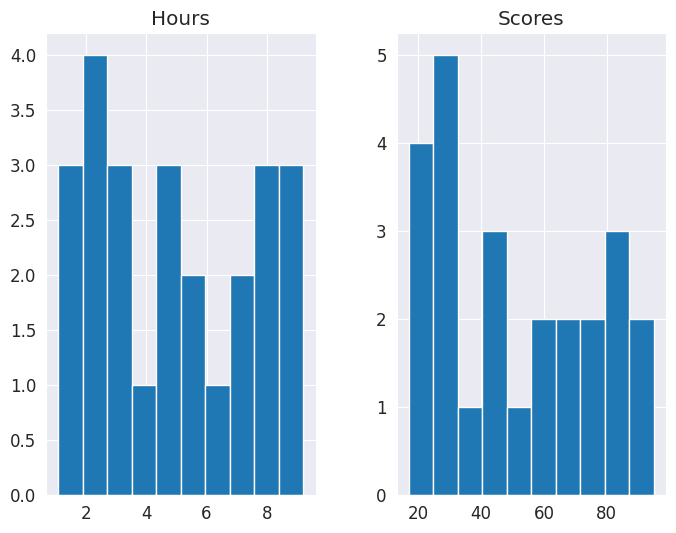

In [42]:
# Histograms
df.hist()
plt.show()

<AxesSubplot: xlabel='Hours', ylabel='Scores'>

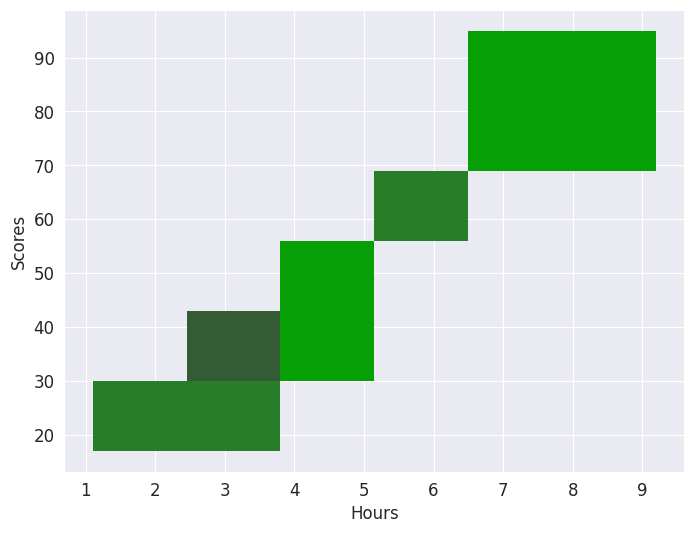

In [43]:
sns.histplot(data=df, x="Hours", y = "Scores" ,color="green", )

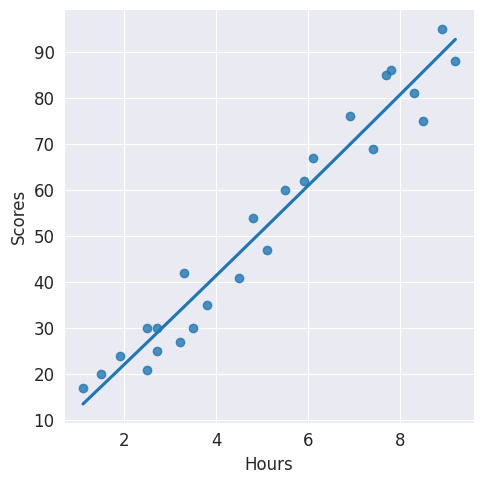

In [44]:
# Check relationship between Hours and Scores
sns.lmplot(x ="Hours", y ="Scores", data = df, order = 2, ci = None)
plt.show()


<AxesSubplot: >

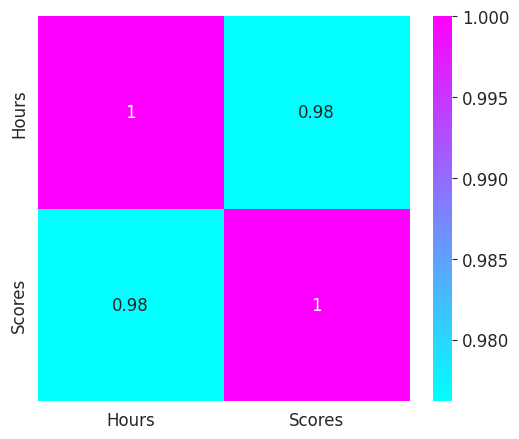

In [45]:
#Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),cmap='cool',annot=True)

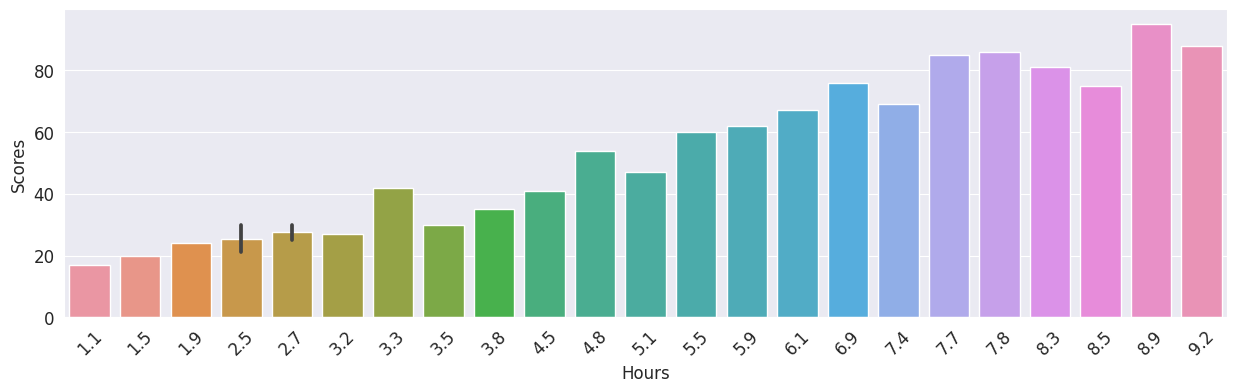

In [46]:
# Hours & Scores
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='Hours',y='Scores')
plt.xticks(rotation=45)
plt.show()

array([[<AxesSubplot: xlabel='Hours', ylabel='Hours'>,
        <AxesSubplot: xlabel='Scores', ylabel='Hours'>],
       [<AxesSubplot: xlabel='Hours', ylabel='Scores'>,
        <AxesSubplot: xlabel='Scores', ylabel='Scores'>]], dtype=object)

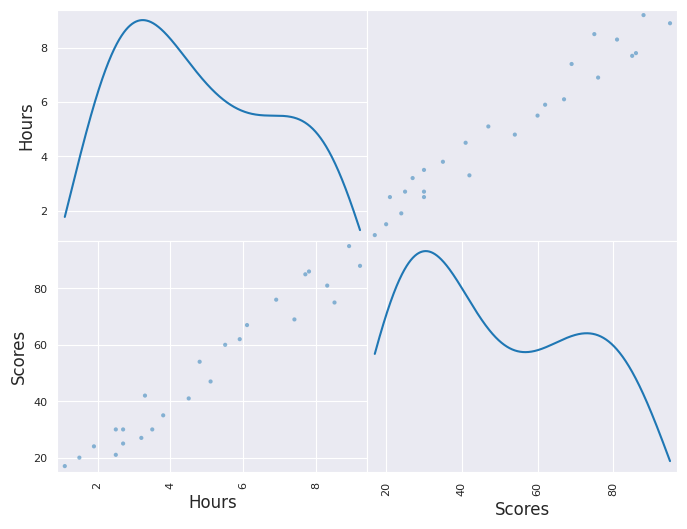

In [47]:
pd.plotting.scatter_matrix(df, diagonal='kde')

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


array([[<AxesSubplot: xlabel='Hours', ylabel='Hours'>,
        <AxesSubplot: xlabel='Scores', ylabel='Hours'>],
       [<AxesSubplot: xlabel='Hours', ylabel='Scores'>,
        <AxesSubplot: xlabel='Scores', ylabel='Scores'>]], dtype=object)

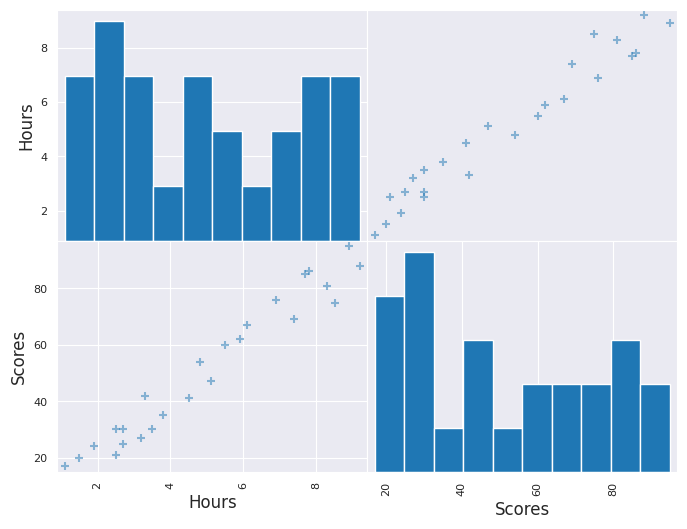

In [48]:
# Pandas scatter_matrix with "+" as markers
pd.plotting.scatter_matrix(df, marker='+')

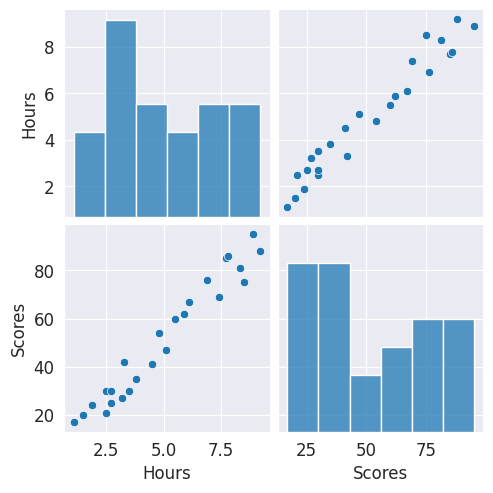

In [67]:
sns.pairplot(df)

In [49]:
#Normalization of the dataset
X = np.array(df['Hours']).reshape(-1, 1)
Y = np.array(df['Scores']).reshape(-1, 1)

# Splitting the Data into Training and Testing

In [50]:
X = df.drop(columns = ["Scores"]).values
Y = df["Scores"].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

In [51]:
# Printing the trainig and testing shape of the data
print(X_train.shape)
print(X_test.shape)

(18, 1)
(7, 1)


# Training of the Model

In [52]:
# Regression Model
regr = LinearRegression()

# Training the data
regr.fit(X_train, Y_train)

LinearRegression()

# Predicting Values

In [55]:
# Predicting the Scores
y_pred = regr.predict(X_test)
y_pred

array([10.1519013 , 32.73976133, 18.36566858, 86.12924869, 48.14057499,
       77.91548141, 61.48794684])

# Evaluation of the Model

In [56]:
# Display the Accuracy of the model
print(regr.score(X_test, Y_test))

0.8980888932690289


In [57]:
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 7.3325591780007
MSE: 57.59433403253168
RMSE: 7.589093096841788


In [58]:
r_sq = regr.score(X, Y)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 0.948337687068065


In [59]:
print(f"Intercept: {regr.intercept_}")
print(f"Slope: {regr.coef_}")

Intercept: -1.1420287231153239
Slope: [10.26720911]


# Predicting Score when Student study Only 9.25 hours/day

In [73]:
hr = 9.25
hrs = np.array(hr).reshape(-1, 1)
# use the predict method to make a prediction on the new data point
prediction = regr.predict(hrs)

print("No. of Hours = {} ".format(hrs))
print("Marks Predicted: ",prediction)

No. of Hours = [[9.25]] 
Marks Predicted:  [93.82965552]


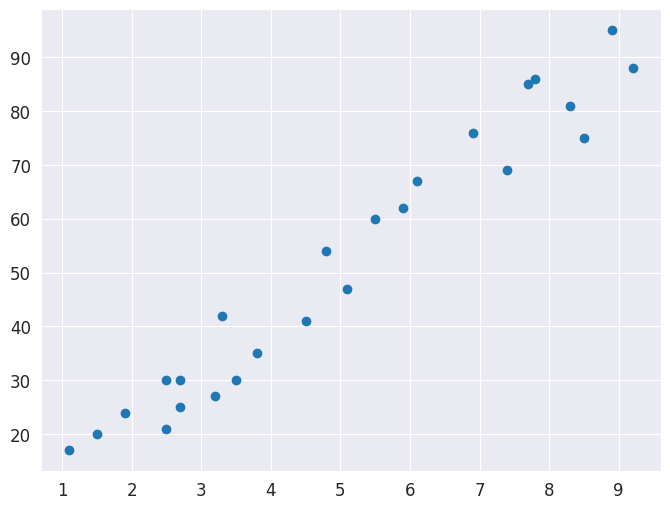

In [65]:
plt.scatter(X, Y)
plt.show()

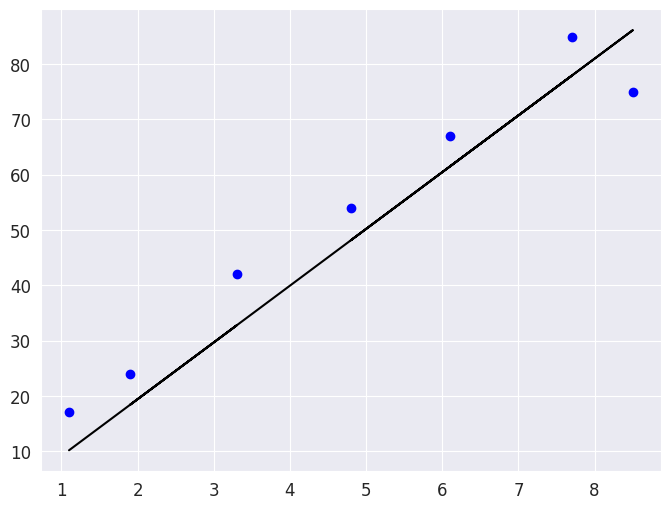

In [66]:
# Scatter plot in between Hours and Scores
y_pred = regr.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()